<a href="https://colab.research.google.com/github/EmanSalah2000/logisticRegressionFromScratch/blob/main/logisticRegressinFromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets  import  make_blobs

In [24]:
class logistic_regression():
  def __init__(self ,X , learning_rate=0.1 , num_iteration=10000):
    self.lr=learning_rate
    self.Num_Iters=num_iteration
     # rows are  training example    columns  are features 
    self.rows , self.columns=X.shape
  def train(self ,X,y):
    self.weights=np.zeros((self.columns,1))
    self.bias=0

    for iter in range(self.Num_Iters+1):
      # calculate prediction of the input 
      Y_predict=self.sigmoid(np.dot(X, self.weights)+ self.bias)

      # calcule the cost  entropy loss

      cost=( -1
            /self.rows
            * np.sum(
                y * np.log(Y_predict)+(1-y)*np.log(1-Y_predict)
                    )
            )

      # backprob    gradient 
      dw=1/self.rows * np.dot(X.T , (Y_predict-y))
      db=1/self.rows *  np.sum(Y_predict-y)

      #update weight

      self.weights-=self.lr*dw
      self.bias-=self.lr*db

      if iter%1000 ==0 :
        print(f'the cost after {iter} is : {cost}')
    return self.weights ,self.bias 

  def predict(self, X):
    Y_predict=self.sigmoid(np.dot(X, self.weights)+ self.bias)
    Y_predict_labels=Y_predict>0.5   # 2 classes   1 for class 1   0 for class 2

    return Y_predict_labels
  def sigmoid(self, z):  # z= wx+b
    return 1/(1+np.exp(-z))

In [25]:
if __name__ == '__main__':
   np.random.seed(1)
   X,y=make_blobs(n_samples=1000 ,centers=2)

   y=y[:,np.newaxis]

   logreg=logistic_regression(X)
   w,b=logreg.train(X,y)
   y_predict=logreg.predict(X)

   print(f'the acc if {np.sum(y==y_predict)/X.shape[0]}')

the cost after 0 is : 0.6931471805599454
the cost after 1000 is : 0.0011600933459921785
the cost after 2000 is : 0.0006491300880665668
the cost after 3000 is : 0.0004624859648872208
the cost after 4000 is : 0.0003635915165060212
the cost after 5000 is : 0.0003016459230941665
the cost after 6000 is : 0.00025890699961499065
the cost after 7000 is : 0.00022749458542860117
the cost after 8000 is : 0.0002033518147326276
the cost after 9000 is : 0.0001841682130989886
the cost after 10000 is : 0.00016852716747729746
the acc if 1.0


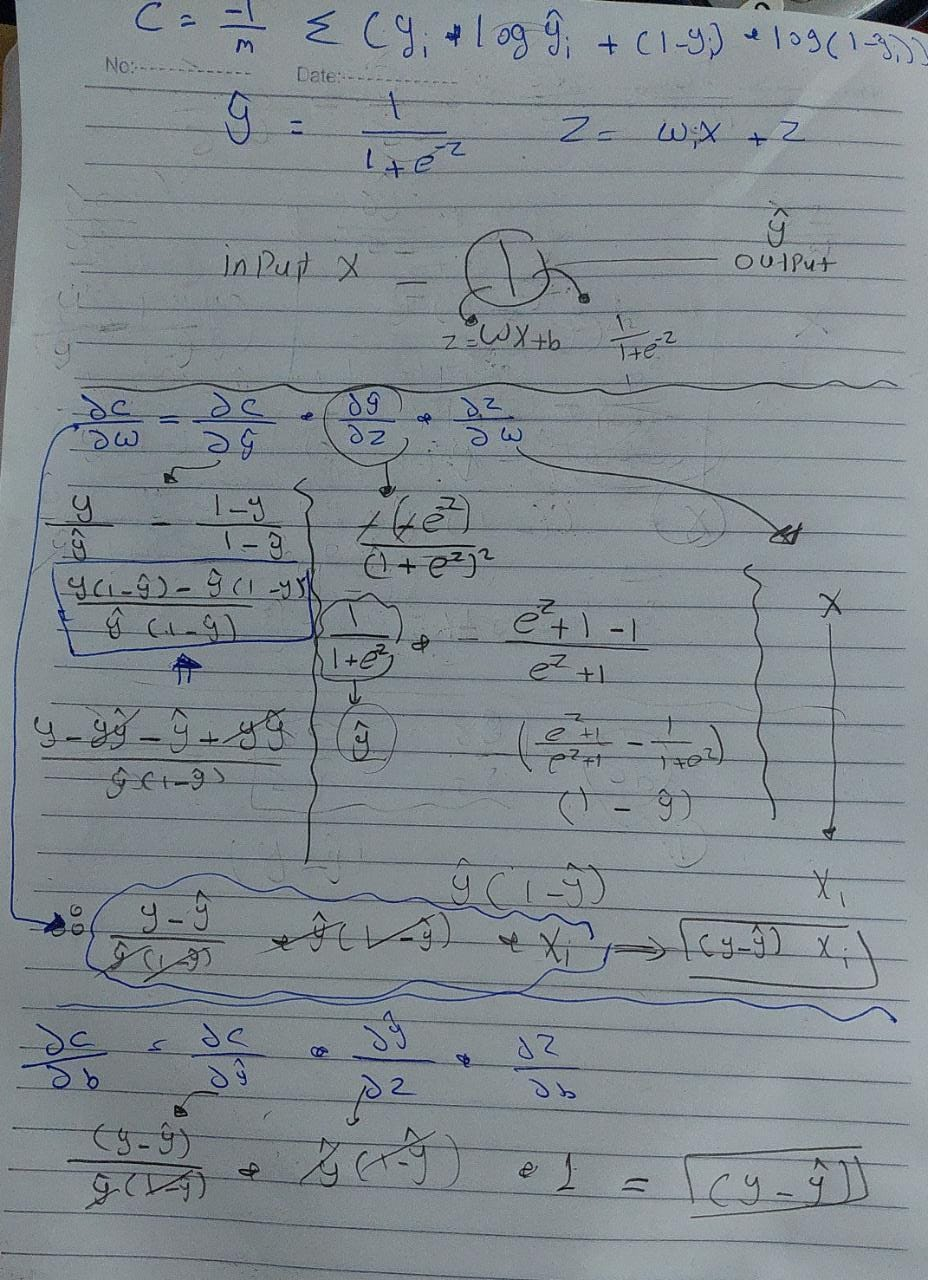
